In [9]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [14]:
ttZ=pandas.read_csv('Files/class_mc_ttZ.csv')

In [15]:
data=pandas.read_csv('Files/class_data.csv')

In [139]:
ttW=pandas.read_csv('Files/class_mc_ttW.csv')

In [132]:
ttZ.head()

,entry,is1L2Tau,is2L2Tau,is2LSS0Tau,pass_tight_2L,pass_SS_2L,is2LSS1Tau,is2LOS1Tau,is3L,is3L1Tau,...,lepSFObjTight,tauSFTight,tauSFLoose,tauFakeSF_weight,tauFakeSF_weight_SYST_JET_UP,tauFakeSF_weight_SYST_JET_DOWN,tauFakeSF_weight_SYST_LEP_UP,tauFakeSF_weight_SYST_LEP_DOWN,tauFakeSF_weight_STAT_UP,tauFakeSF_weight_STAT_DOWN
0,0,False,False,False,False,False,False,False,True,False,...,0.914884,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,False,False,False,False,False,False,False,True,False,...,0.892475,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2,False,False,False,False,False,False,False,True,False,...,0.949663,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,False,False,False,False,False,False,False,True,False,...,0.946399,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,False,False,False,False,False,False,False,True,False,...,0.929530,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [133]:
def weight_df(df):    
    df['lumiscale'] = df.RunYear.apply(
               lambda x: (36074.6 if (x == 2015 or x == 2016) else 43813.7))
    weights = df.lumiscale*df.pileupEventWeight_090*df.scale_nom*df.JVT_EventWeight*df.MV2c10_70_EventWeight*df.lepSFObjTight*df.lepSFTrigTight*df.SherpaNJetWeight

    #weights=weights.where(df.RunYear == 2015) 
    #weights=weights.where((df.RunYear == 2016) & (df.RunYear == 2015),other=-2*weights) 
    return weights
#define weights:
#weights_list=['pileupEventWeight_090','scale_nom','JVT_EventWeight','MV2c10_70_EventWeight','lepSFObjTight','lepSFTrigTight','SherpaNJetWeight']
#w_tot=pileupEventWeight_090[f]*scale_nom[f]*JVT_EventWeight[f]  *MV2c10_70_EventWeight[f] *lepSFObjTight[f] * lepSFTrigTight[f]* SherpaNJetWeight[f]
 #* ( 36074.6*( RunYear[f]==2015 || RunYear[f]==2016 ) + 43813.7*( RunYear[f]==2017 ) );


In [134]:
w=weight_df(ttZ)

In [135]:
ttZ['t_w']=w

In [140]:
wW=weight_df(ttW)
ttW['t_w']=wW

In [173]:
ttW.Mll01.head()*0.001

0    185.854660
1     25.506521
2    120.045880
3    174.926750
4     75.214770
Name: Mll01, dtype: float64

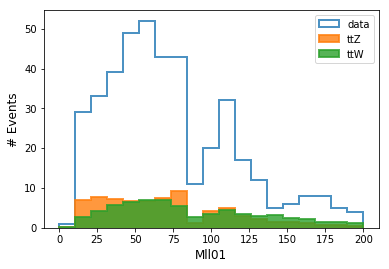

In [177]:
#hd_ttH.head()
var='Mll01'
scale_to_GeV=0.001
binning = {"DRll01": np.linspace(-2, 6, 24),
           "max_eta": np.linspace(0, 2.5, 26),
           "Mll01": np.linspace(0, 200, 20)}
plt.hist(data[var]*scale_to_GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)

plt.hist(ttZ[var]*scale_to_GeV, binning[var], histtype='step',
         weights=ttZ.t_w,
         label=["ttZ"],
         stacked=False, 
         fill=True, 
         linewidth=2, alpha=0.8)
plt.hist(ttW[var]*scale_to_GeV, binning[var], histtype='step',
         weights=ttW.t_w,
         label=["ttW"],
         stacked=False,
         fill=True, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()

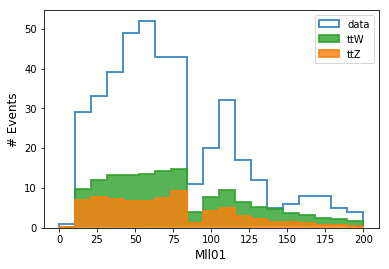

In [178]:
plt.hist(data[var]*scale_to_GeV, binning[var], histtype='step',
         label=["data"],
         stacked=False, 
         fill=False, 
         linewidth=2, alpha=0.8)
plt.hist([ttZ[var]*scale_to_GeV,ttW[var]*scale_to_GeV], binning[var], histtype='step',
         weights=[ttZ.t_w,ttW.t_w],
         label=["ttZ","ttW"],
         stacked=True, 
         fill=True, 
         linewidth=2, alpha=0.8)
plt.xlabel(var,fontsize=12)
plt.ylabel('# Events',fontsize=12)
#plt.yscale('log')
plt.legend()        